# LAB 3

We will now use the tools we have learned to perform a simple study of a certain first order ODE problem. The problem comes from Spruce Budworm that has a tendency to periodically eat up fir tree forests in eastern Canada. The original research comes from Ludwig 1976 available here: https://www.jstor.org/stable/3939?seq=1 but is also discussed in a very good book by Strogatz "Nonlinear Dynamics and Chaos". 

## Tasks to be performed:
1. Examine the problem. Try to determine fixed points of the solution.
2. Solve the ODE for different initial conditions. Check what the solution approaches to.
3. Prepare the solution surface as a function of system parameters and determine "refuge", "bistable" and "outbreak" states. Try out different initial conditions.
4. Examine evolution of the system as parameters are slowly varied in time.
5. What should we do with the bugs?

In [ ]:
#Imports we might need
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Produces 3D axes setting
from scipy.integrate import odeint
from matplotlib import cm

# Introduction
The problem is a variant of a logistical equation, or the predator-pray problem in which the population of A is consumed by B according to a simple (but nonlinear) model. We assume population of the worm changes according to:

$$
\dot{N}=RN(1-\frac{N}{K}) - p(N)
$$

where $R$ is the growth parameter, $K$ is the carrying capacity of the ecosystem (how much $N$ can be sustained), and $p(N)$ is the decrease of the population $N$ due to predation by birds. Disregarding $p(N)$ we have a simple equation:

$$
\dot{N}=RN(1-\frac{N}{K})
$$

Following Ludwig 1976 we will adopt a nonlinear predation model:

$$
p(N)=\frac{BN^2}{A^2+N^2}
$$

with $A$ and $B$ some constants. The meaning of this model is such, that for a small worm population birds look for food elsewhere, but when it exceeds a certain value birds simply do not eat the worm fast enough. Or in other words predation saturates.

The entire problem can be rewritten in a non dimensional form:

$$
\dot{x} = rx(1-\frac{x}{k})-\frac{x^2}{1+x^2}
$$

Our task today is to examine this model and to construct the parametric surface $x(r,k)$ as well as to produce some understanding as to how the model behaves. 

Eventually, we will introduce a small change to the model, by allowing $r$ to increase with time at a slow peace, which should correspond to the increase in the foliage cover of the forest (as time passes, there is more trees and more leaves). We should be able to reach the outbreak region, which would result in a "catastrophe". This would be understood as a rapid change in the population of the worm, with a very mild, and continuous change of system parameters. Note: Do you see a relation to the virus outbreak?

# Task 1
Choose $r=0.4$ and $k=14$ as starting values and plot the two parts that constitute the RHS of the model. I.e.:
$
f(x) = rx(1-\frac{x}{k}) \text{ and } p(x)=\frac{x^2}{1+x^2}
$
Determine intersection points of the two curves and mark them on the plot using `scatter`.

{0.0, 0.4729309453155188, 2.7457280539128814, 10.781341000771603}
      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 10.781341000771603 10.781341000771603 -6.661338147750939e-16


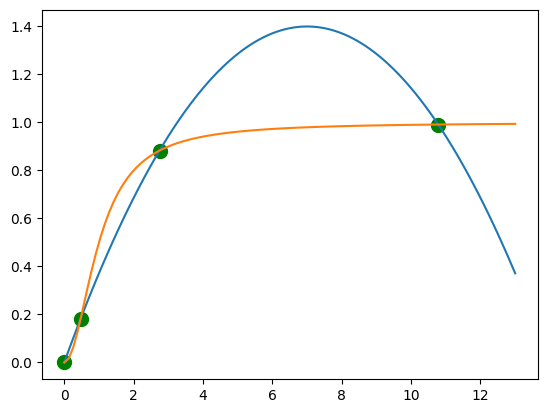

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

def fun(x):
  return r*x*(1-(x/k))-x*x/(1+x*x)
def f(x):
  return r*x*(1-(x/k))
r = 0.4
k = 14
potential = [0,0.5,2,10]
res = root_scalar(fun,x0=0,x1=1)
roots=[]
for i in potential:
  res = root_scalar(fun,x0=i,x1=i+1)
  plt.scatter( res.root,f(res.root),s=100,color='green')
  roots.append(res.root)

print(set(roots))
print(res, res.root, fun(res.root))



x= np.linspace(0,13,101)
y=r*x*(1-x/k)
p=x*x/(1+x*x)
plt.plot(x,y)
plt.plot(x,p)


# Task 2
Now examine the sign of the left hand of the ODE and decide which of those three points can pose as a stable solution. All comes down to estimating the sign and deciding should $x$ increase or decrease?

Now let move on, solve the problem and examine if points we determined are attainable depending on the initial condition? We will use the ODE solver for this.

[[2.        ]
 [1.98849954]
 [1.97685521]
 ...
 [0.47293094]
 [0.47293094]
 [0.47293094]]


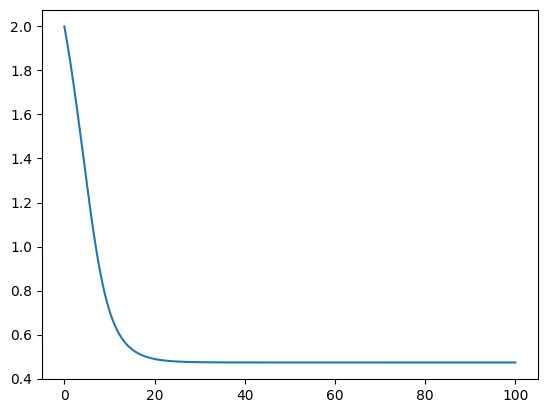

In [80]:
from scipy.integrate import odeint

def fun(x0,t0):
  return [r*x0[0]*(1-(x0[0]/k))-x0[0]*x0[0]/(1+x0[0]*x0[0])]
x0=[2]
N=np.linspace(0,100,1001)
dN = odeint(fun,x0,N)
plt.plot(N,dN)
print(dN)

# Task 3
Note the two points "on the outsides" seem like stable solutions. That is solution approaches those in time. How about the middle point? Is it stable? No, it is not, any small deviation will send the system to either of the stable points. Try to integrate using the middle point as initial condition with a very small deviation.

[[2.74172805]
 [2.74165355]
 [2.74157766]
 ...
 [0.47293095]
 [0.47293095]
 [0.47293095]]


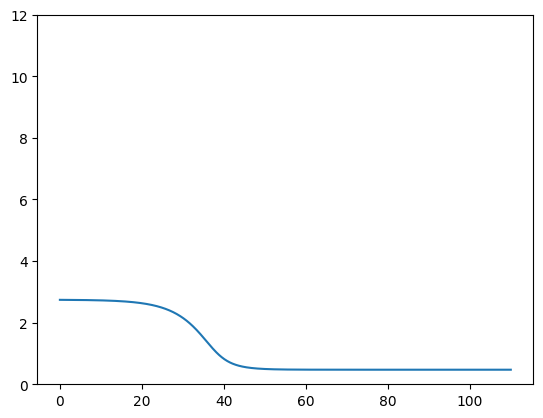

In [97]:
from scipy.integrate import quad

def fun(x0,t0=0):
  return r*x0*(1-(x0/k))-x0*x0/(1+x0*x0)
x0=2.7417280539728814
N=np.linspace(0,110,1001)
dN = odeint(fun,x0,N)
plt.plot(N,dN)
plt.ylim(0,12)
print(dN)

# Task 4
We can now attempt to plot the solution surfaces. We could solve the ODE for each configuration, or just look for roots. We should choose the former solution. It requires us to solve an ODE, but we have no trouble selecting the correct root.

In [98]:
r = np.linspace(0.01, 1.0, 50)
k = np.linspace(0.01, 20, 50)
R,K = np.meshgrid(r,k)

t = np.linspace(0, 200, 1000)  # one thousand time steps
sh = R.shape
X1 = np.zeros_like(R)
X2 = np.zeros_like(R)
print(R.shape)

(50, 50)


Before we start, try to illustrate how the number of roots changes with system parameters. You can do this, by plotting the predation function and than the logistic part for different $k$ and $r$ values.

What we need now is to solve an ODE for each and every $(r,k)$ pair with initial condition chosen such that we obtain both of the stable solutions. You could use the code snippet below:
``` 
x0 = 2
xt1 = odeint(lor_rhs, x0, t)
X1[i,j] = xt1[-1]

x0 = 10
xt2 = odeint(lor_rhs, x0, t)
X2[i,j] = xt2[-1]
```

Plot the 3D surface:

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D # Produces 3D axes setting
from matplotlib import cm

font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(R, K, X2, color='red', alpha=1)
surf = ax.plot_surface(R, K, X1, color='blue', alpha=0.5)

plt.show()

# Task 5
Now time for a catastrophe to happen. We will evolve the spruce population in time and assume that conditions of the habitat change slowly in time. That is, as the time goes by, forest grows, there is more leaves to feed on and to hide in. This will translate to a relatively slow change of the habitat caring capacity $k$. We will fix $r=0.4$ and vary $k$ from $5$ up.

In [ ]:
x0 = 0.5
r = 0.6
k = 5
t = np.linspace(0, 200, 1000)

Try to show how the population explodes as parameters $(r,k)$ approach the critical region, we have seen upon finishing Task 4.